In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import yaml

In [106]:
config = 'config.yml'
with open(config) as f:
    conf = yaml.load(f, Loader=yaml.FullLoader)

df = pd.read_parquet(conf['data_path'])

In [90]:
def plot_2d_hist(x, y, bins=None, title=None, xlabel=None, ylabel=None):
    fig, ax = plt.subplots(dpi=150)
    cmap = cm.binary
    if bins:
        ax.hist2d(x, y, bins, cmap=cmap) 
    else:
        ax.hist2d(x, y, cmap=cmap)
    if title:
        ax.set_title(title, fontsize=16)
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=12)
    if ylabel:
        ax.set_ylabel(ylabel, fontsize=12)
    
    plt.colorbar(cm.ScalarMappable(cmap=cmap))
    ax.grid(True, alpha=0.25)
    # ax.set_xlim(10,30)
    # ax.set_ylim(20,30)
    plt.show()
    
def plot_scatter(x, y, title=None, xlabel=None, ylabel=None):
    fig, ax = plt.subplots(dpi=150)
    ax.scatter(x, y, s=2, c='k')
    if title:
        ax.set_title(title, fontsize=16)
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=12)
    if ylabel:
        ax.set_ylabel(ylabel, fontsize=12)
    
    x1 = np.linspace(-40, 36, 1000)
    y1 = x1
    ax.plot(x1, y1, '-b')
    ax.grid(True, alpha=0.25)
    # ax.set_xlim(20,35)
    # ax.set_ylim(20,30)
    plt.show()

In [107]:
x = df['TEMP_C_0_m'][(df['sn_percent'] > 0)]# & (df['TEMP_C_0_m'] > 20)]
# x = (df['DEWPOINT_2M_C'] + df['DEWPOINT_DEPRES_2M_C'] + 273.15)[(df['sn_percent'] > 0)]# & (df['TEMP_C_0_m'] > 20)]

# y = df['HGT_ON_SFC_m'][(df['sn_percent'] > 0)]# & (df['TEMP_C_0_m'] > 20)]
y = df['T_DEWPOINT_C_0_m'][(df['sn_percent'] > 0)]# & (df['TEMP_C_0_m'] > 20)]
# y = df['DEWPOINT_2M_C'][(df['sn_percent'] > 0)]# & (df['TEMP_C_0_m'] > 20)]

# 0 m Dewpoint Temp ($\degree$C)

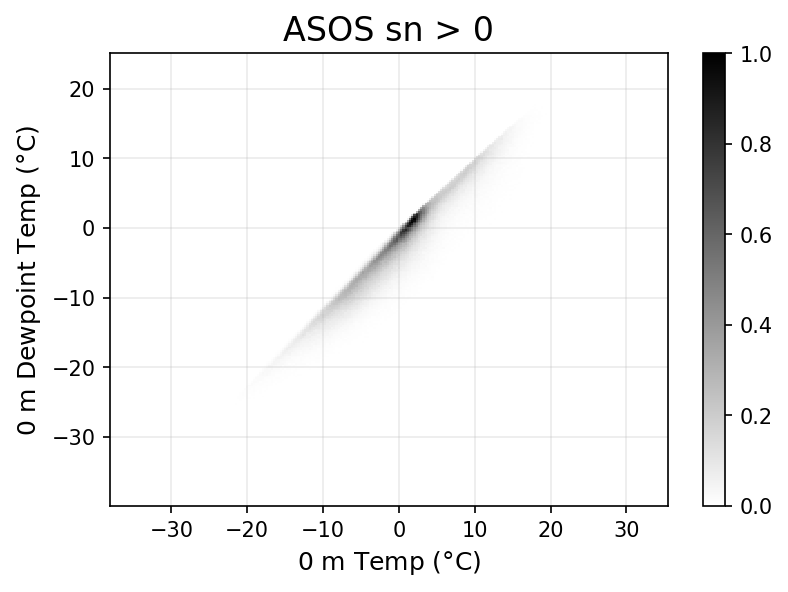

In [110]:
plot_2d_hist(x, y, 250,  title='ASOS sn > 0', xlabel='0 m Temp ($\degree$C)', ylabel='0 m Dewpoint Temp ($\degree$C)')

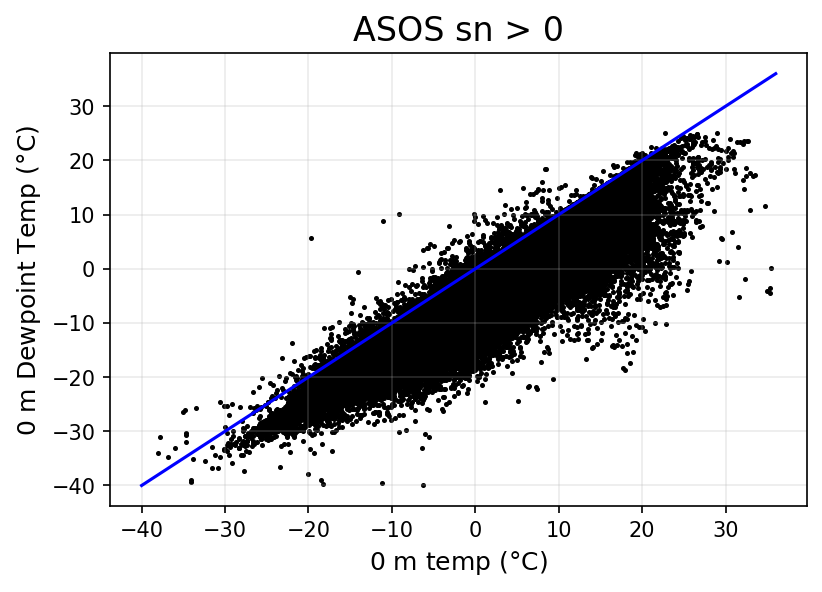

In [111]:
plot_scatter(x, y, title='ASOS sn > 0', xlabel='0 m temp ($\degree$C)', ylabel='0 m Dewpoint Temp ($\degree$C)')